<a href="https://colab.research.google.com/github/AkashKalme/NIDS-using-ML/blob/main/NIDS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Intrusion Detection System using Machine Learning

**NSL-KDD Dataset Information**

KDDTrain+.ARFF The full NSL-KDD train set with binary labels in ARFF format

KDDTrain+.TXT The full NSL-KDD train set including attack-type labels and difficulty level in CSV format

The full NSL-KDD train set including attack-type labels and difficulty level in CSV format

KDDTrain+_20Percent.ARFF A 20% subset of the KDDTrain+.arff file

KDDTrain+_20Percent.TXT A 20% subset of the KDDTrain+.txt file

KDDTest+.ARFF The full NSL-KDD test set with binary labels in ARFF format

KDDTest+.TXT The full NSL-KDD test set including attack-type labels and difficulty level in CSV format

KDDTest-21.ARFF A subset of the KDDTest+.arff file which does not include records with difficulty level of
21 out of 21

KDDTest-21.TXT A subset of the KDDTest+.txt file which does not include records with difficulty level of 21
out of 21

**Improvements to the KDD'99 data set**

The NSL-KDD data set has the following advantages over the original KDD data set:
It does not include redundant records in the train set, so the classifiers will not be biased towards more frequent records.

There is no duplicate records in the proposed test sets; therefore, the performance of the learners are not biased by the methods which have better detection rates on the frequent records.

The number of selected records from each difficultylevel group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of distinct machine learning methods vary in a wider range, which makes it more efficient to have an accurate evaluation of different learning techniques.

The number of records in the train and test sets are reasonable, which makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research works will be consistent and comparable.

## Import the Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Datasets and Preprocess the Datasets

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/AkashKalme/NIDS-using-ML/main/NSL-KDD/KDDTrain%2B.txt")
df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
df_train.shape

(125972, 43)

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

len(columns)

43

In [ ]:
df_train.columns = columns
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/AkashKalme/NIDS-using-ML/main/NSL-KDD/KDDTest%2B.txt")
df_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
df_test.shape

(22543, 43)

In [ ]:
df_test.columns = columns
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.0,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,0.002440,0.000266,0.114670,0.008739,0.001153,0.003549,0.0,0.000488,0.028435,79.021692,31.125316,0.102928,0.103640,0.238429,0.235145,0.740376,0.094075,0.098115,193.866699,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,0.049335,0.021061,8.041792,0.676857,0.048015,0.067831,0.0,0.022085,0.166214,128.538218,89.064396,0.295373,0.298337,0.416096,0.416193,0.412479,0.259143,0.253550,94.036867,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.000000,16.000000,0.000000,0.000000,0.250000,0.070000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
df_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df_test.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
print(sorted(df_train["protocol_type"].unique()))
print(sorted(df_test["protocol_type"].unique()))

['icmp', 'tcp', 'udp']
['icmp', 'tcp', 'udp']


In [ ]:
print(sorted(df_train["service"].unique()))
print(sorted(df_test["service"].unique()))

['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dg

In [ ]:
print(sorted(df_train["flag"].unique()))
print(sorted(df_test["flag"].unique()))

['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']
['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']


In [ ]:
print(sorted(df_train["level"].unique()))
print(sorted(df_test["level"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [ ]:
print(sorted(df_train["attack"].unique()))
print(sorted(df_test["attack"].unique()))

['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap', 'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster']
['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb', 'mscan', 'multihop', 'named', 'neptune', 'nmap', 'normal', 'perl', 'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit', 'saint', 'satan', 'sendmail', 'smurf', 'snmpgetattack', 'snmpguess', 'sqlattack', 'teardrop', 'udpstorm', 'warezmaster', 'worm', 'xlock', 'xsnoop', 'xterm']


Joining the Training and Testing Dataset to Randomize the Input

In [ ]:
df = pd.concat([df_train, df_test])

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df['hot'].groupby(df['protocol_type']).value_counts()

protocol_type  hot
icmp           0        9334
tcp            0      117889
               2        1883
               1         459
               28        277
               30        258
               4         193
               6         146
               5          87
               24         68
               3          66
               19         58
               22         57
               18         48
               14         30
               7          14
               20          9
               15          5
               11          4
               10          3
               9           2
               25          2
               44          2
               8           1
               12          1
               17          1
               21          1
               33          1
               77          1
               101         1
udp            0       17614
Name: hot, dtype: int64

In [ ]:
df.loc[df['protocol_type']=='icmp', 'service'].value_counts()

eco_i    4848
ecr_i    3829
urp_i     625
tim_i      14
urh_i      10
red_i       8
Name: service, dtype: int64

In [ ]:
df.shape

(148515, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13  

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,148515.000000,1.485150e+05,1.485150e+05,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.0,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.00000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000
mean,276.783032,4.022849e+04,1.708908e+04,0.000215,0.020523,0.000202,0.189382,0.004323,0.402794,0.255065,0.001508,0.000976,0.273730,0.012073,0.000525,0.004013,0.0,0.000081,0.012309,83.336128,28.252237,0.256928,0.25534,0.137942,0.138482,0.672985,0.067762,0.097443,183.927792,119.464034,0.534526,0.084104,0.145933,0.030584,0.256125,0.251308,0.136215,0.136392,19.278463
std,2460.699490,5.409648e+06,3.703550e+06,0.014677,0.240071,0.019417,2.013173,0.072249,0.490462,22.231525,0.038807,0.042389,22.689176,0.517867,0.027701,0.095257,0.0,0.008989,0.110259,116.760724,75.370097,0.431920,0.43258,0.339382,0.341778,0.436543,0.194667,0.258887,98.528779,111.232434,0.448061,0.194103,0.308639,0.108976,0.428501,0.429721,0.322735,0.335277,2.739772
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,141.000000,17.000000,0.850000,0.91000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,100.000000,5.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Dataset Visualization

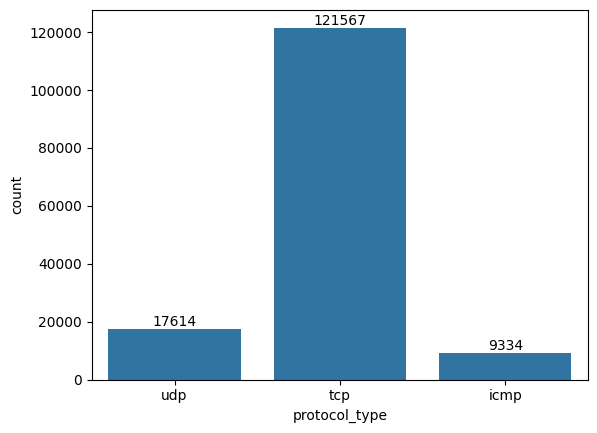

In [ ]:
ax = sns.countplot(data=df, x="protocol_type")
for container in ax.containers:
    ax.bar_label(container)

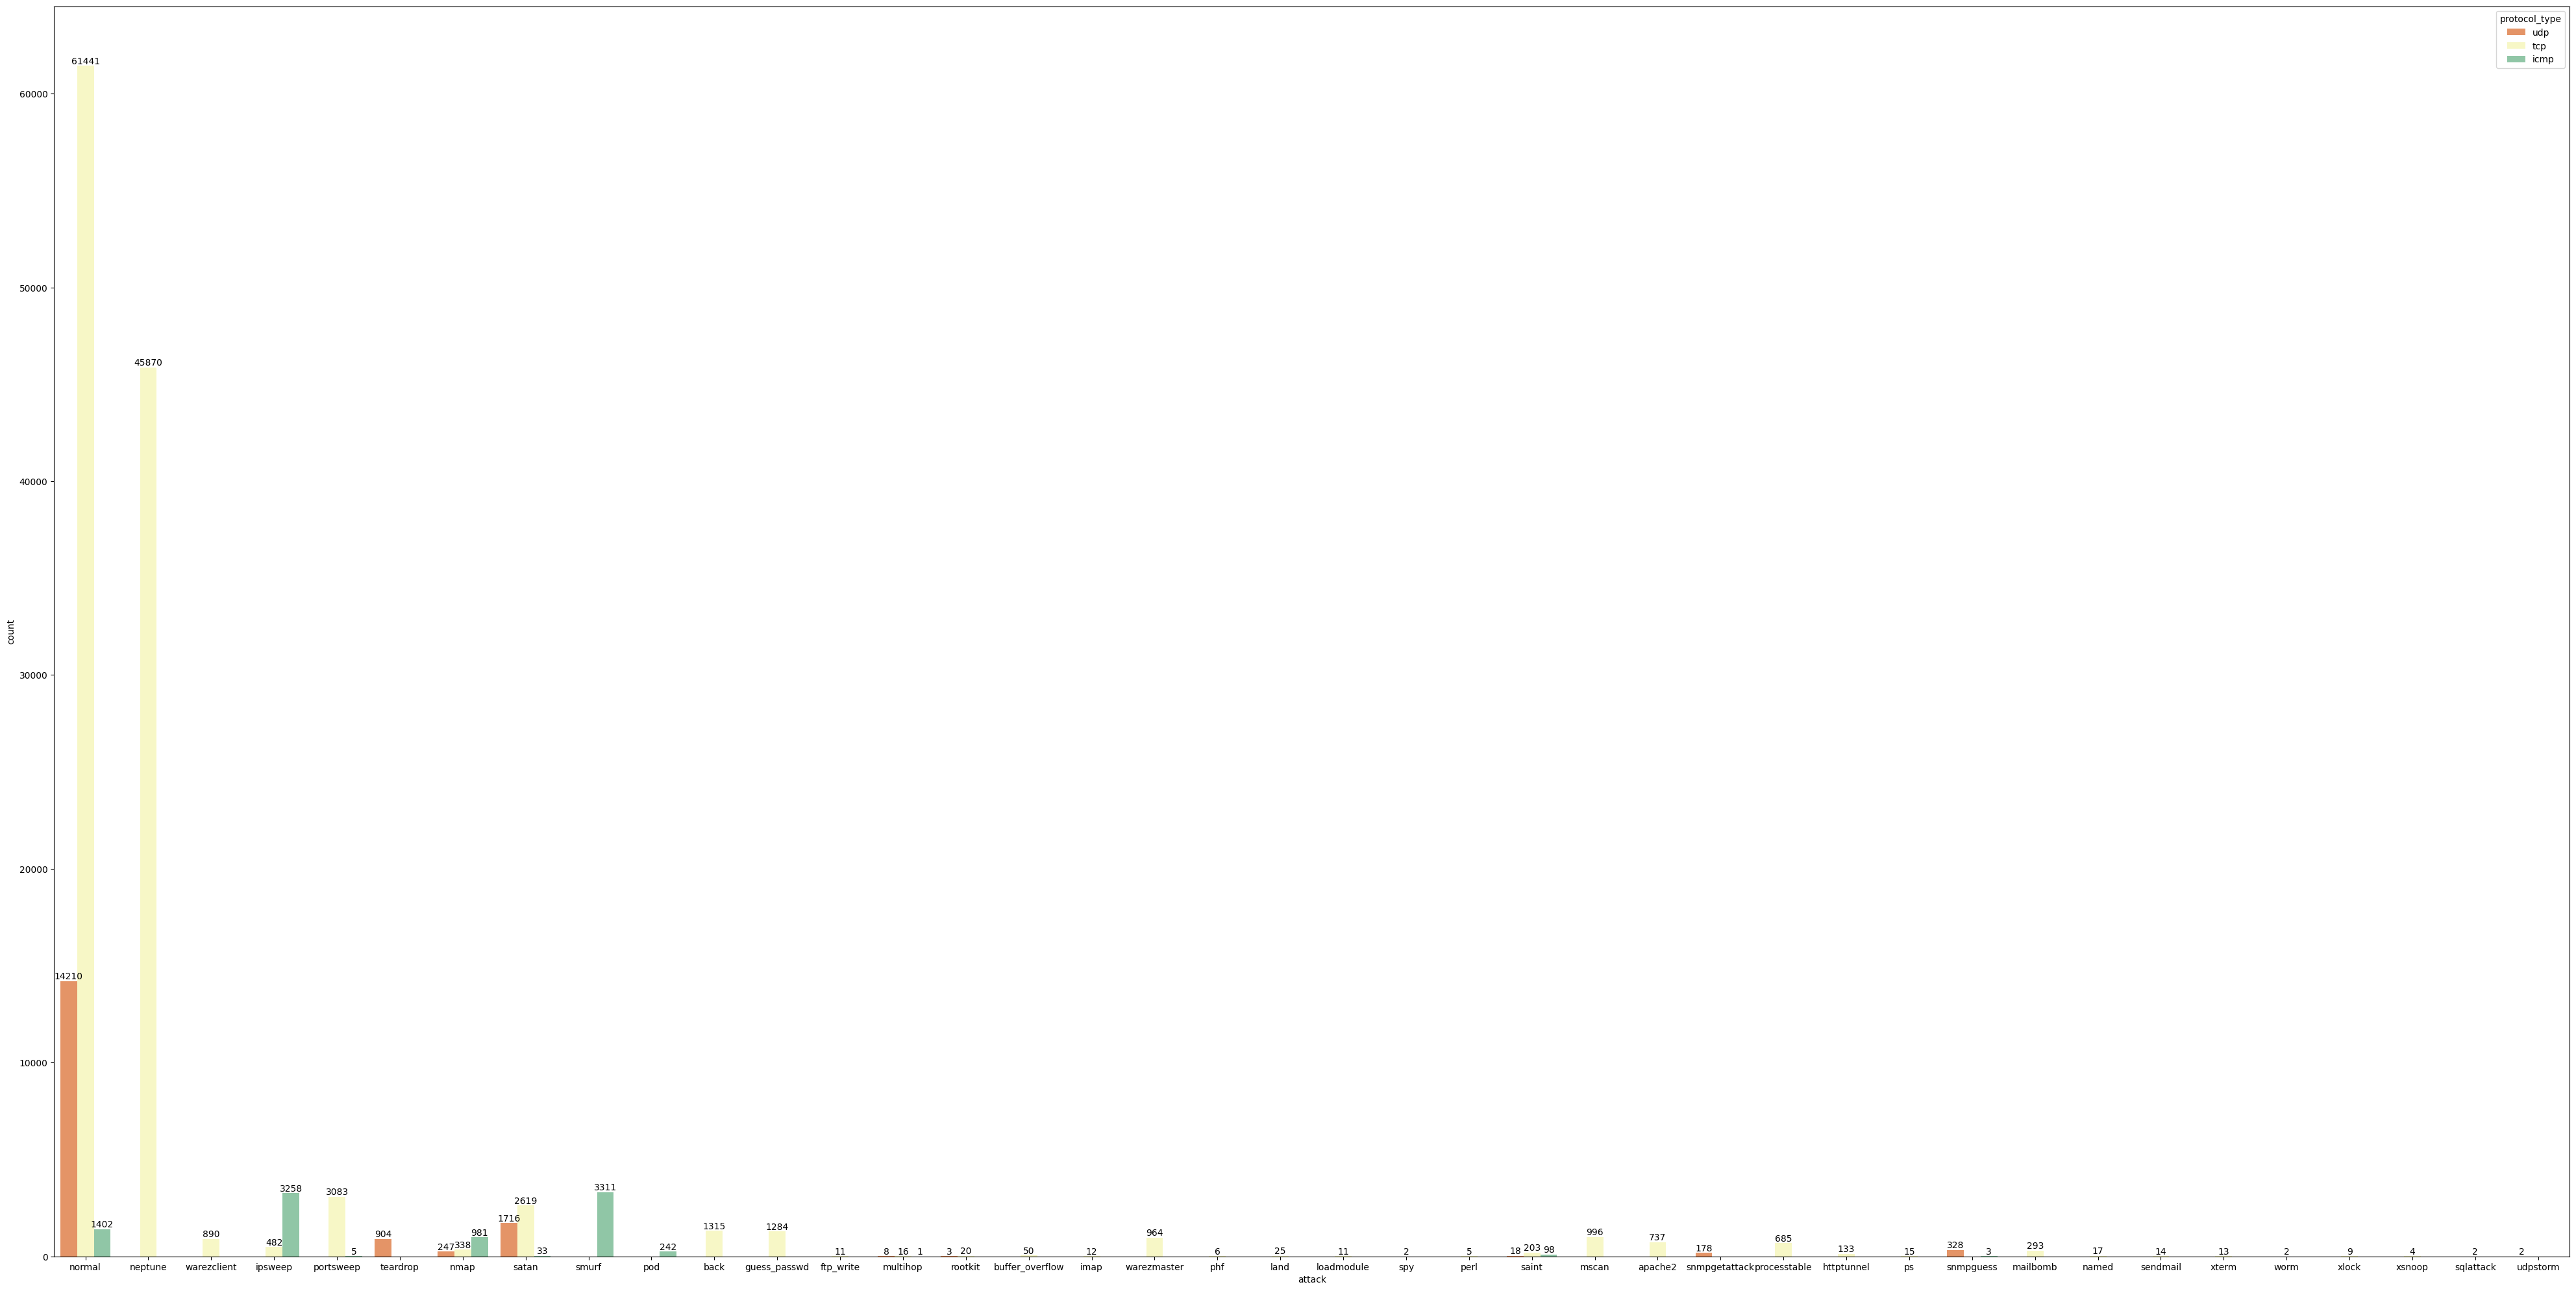

In [ ]:
plt.figure(figsize=(50, 25))
ax = sns.countplot(data=df, x="attack", hue="protocol_type",palette="Spectral")
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
df["attack"].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [ ]:
print(df[["protocol_type", "attack"]].groupby(["protocol_type", "attack"]).value_counts())

protocol_type  attack         
icmp           ipsweep             3258
               multihop               1
               nmap                 981
               normal              1402
               pod                  242
               portsweep              5
               saint                 98
               satan                 33
               smurf               3311
               snmpguess              3
tcp            apache2              737
               back                1315
               buffer_overflow       50
               ftp_write             11
               guess_passwd        1284
               httptunnel           133
               imap                  12
               ipsweep              482
               land                  25
               loadmodule            11
               mailbomb             293
               mscan                996
               multihop              16
               named                 17
         

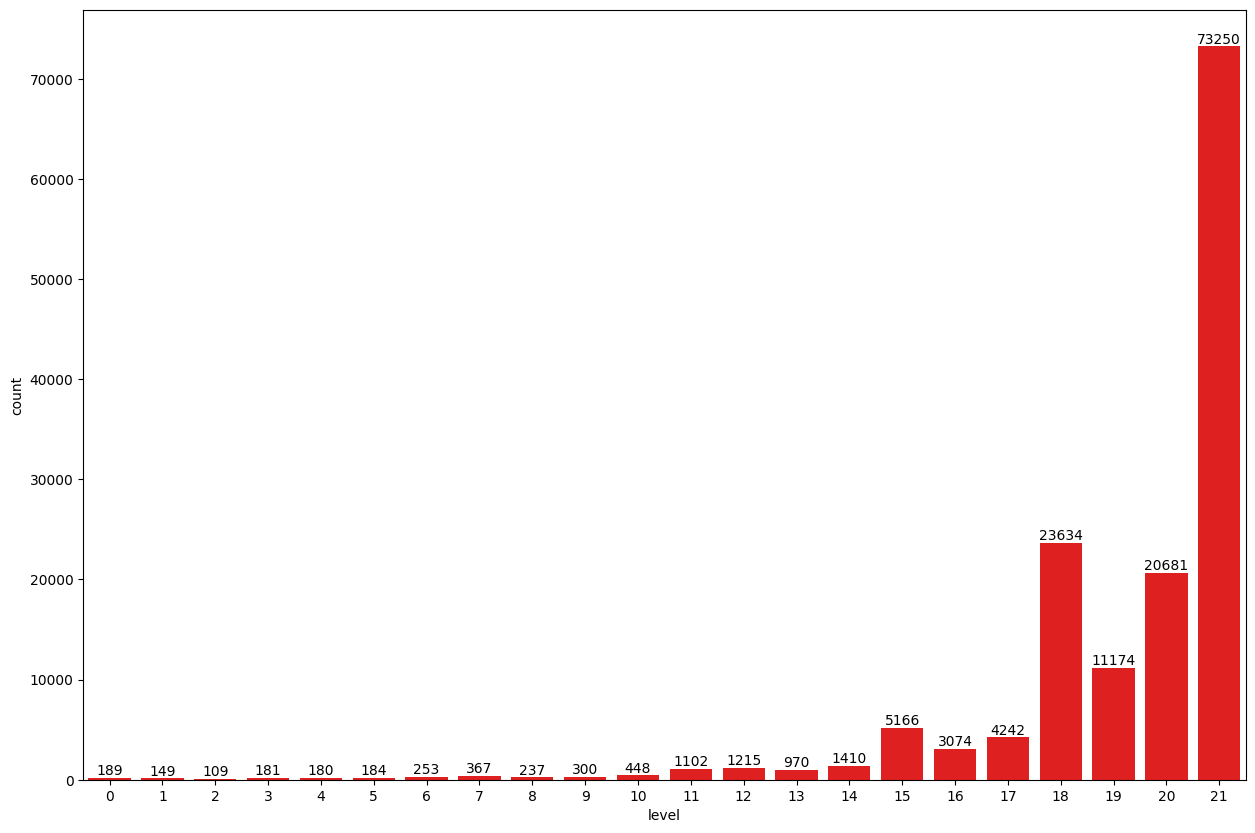

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df, x="level",  color="red")
for container in ax.containers:
    ax.bar_label(container)

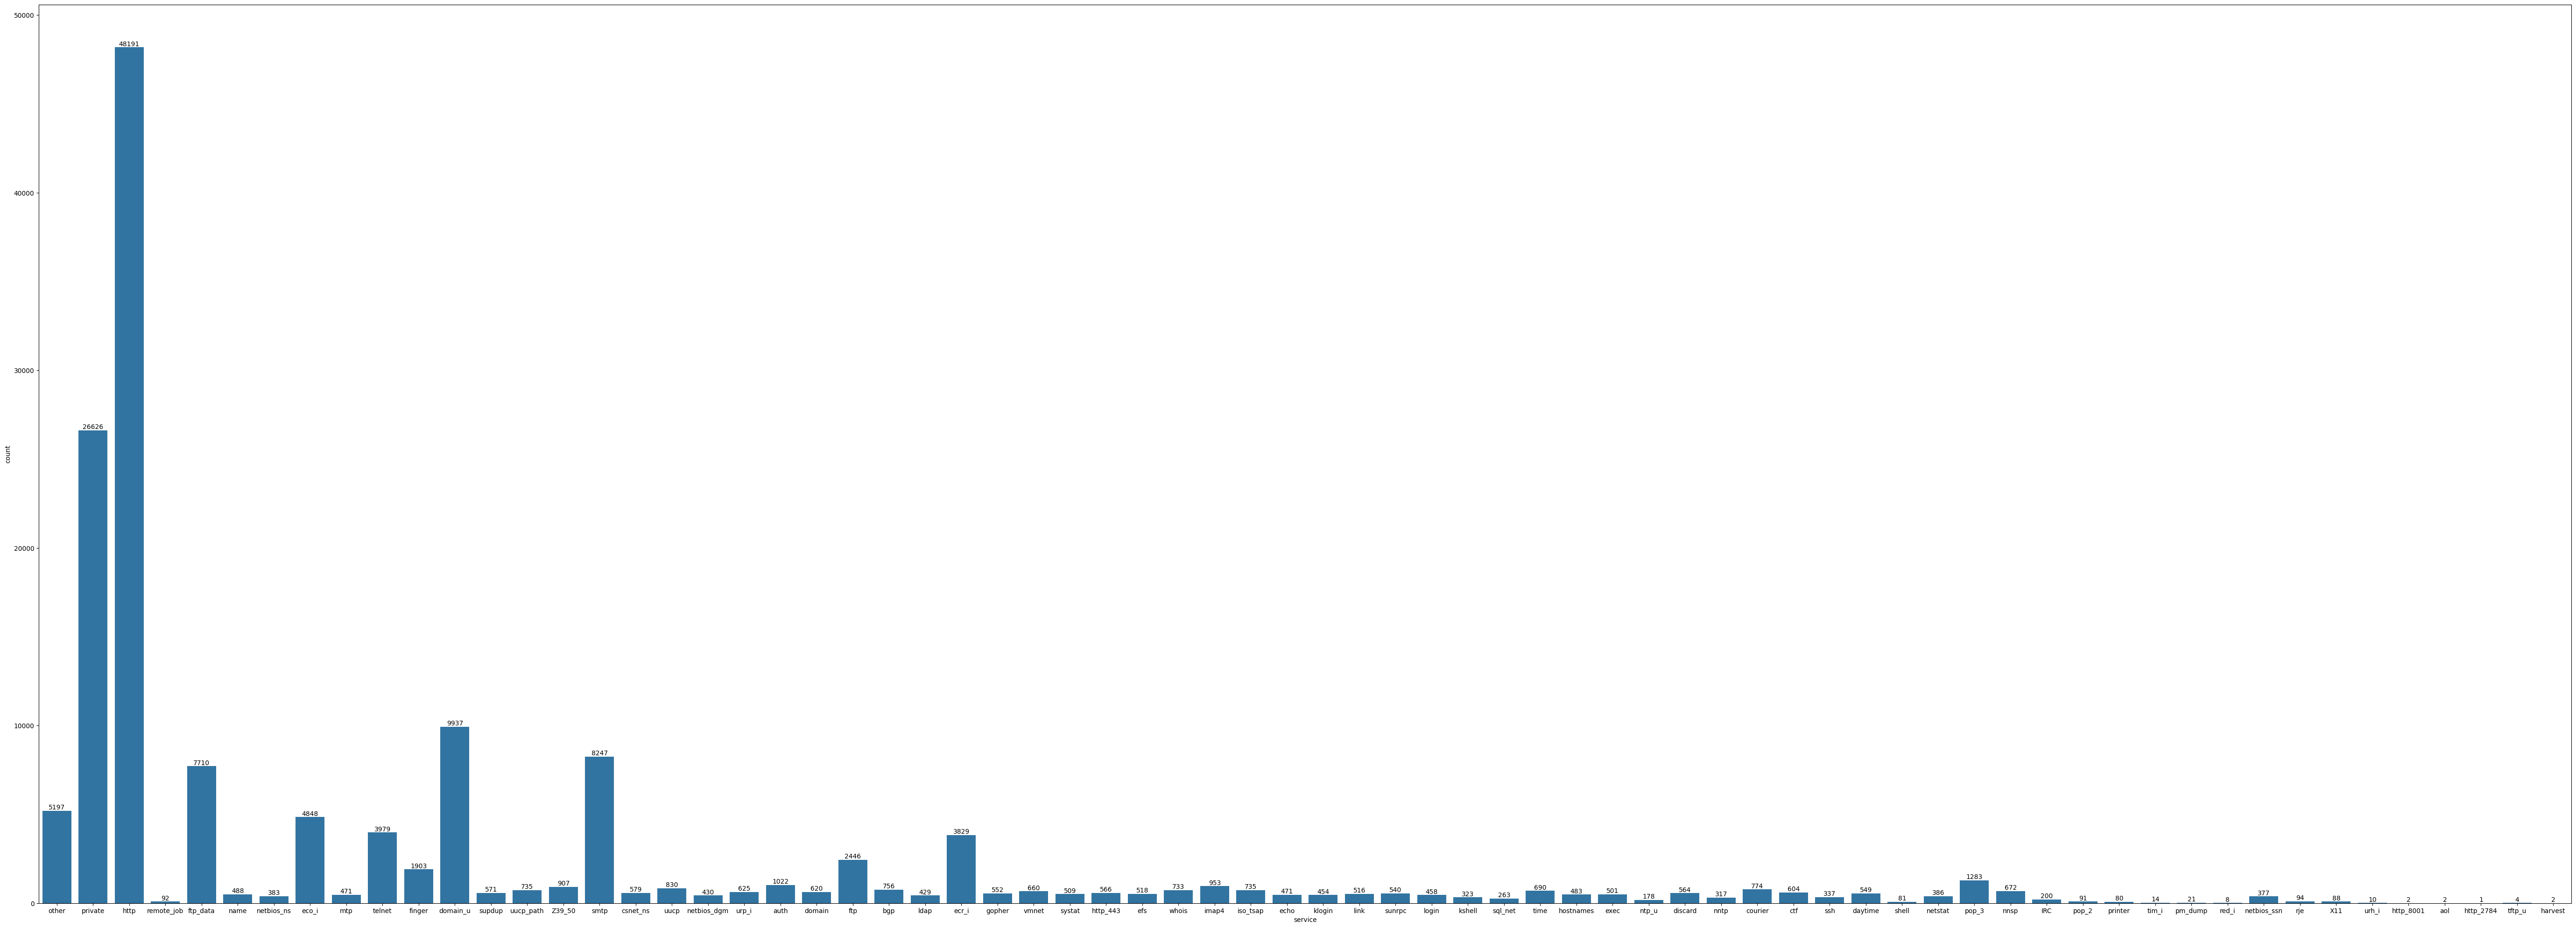

In [ ]:
plt.figure(figsize=(70, 25))
ax = sns.countplot(data=df, x="service")
for container in ax.containers:
    ax.bar_label(container)

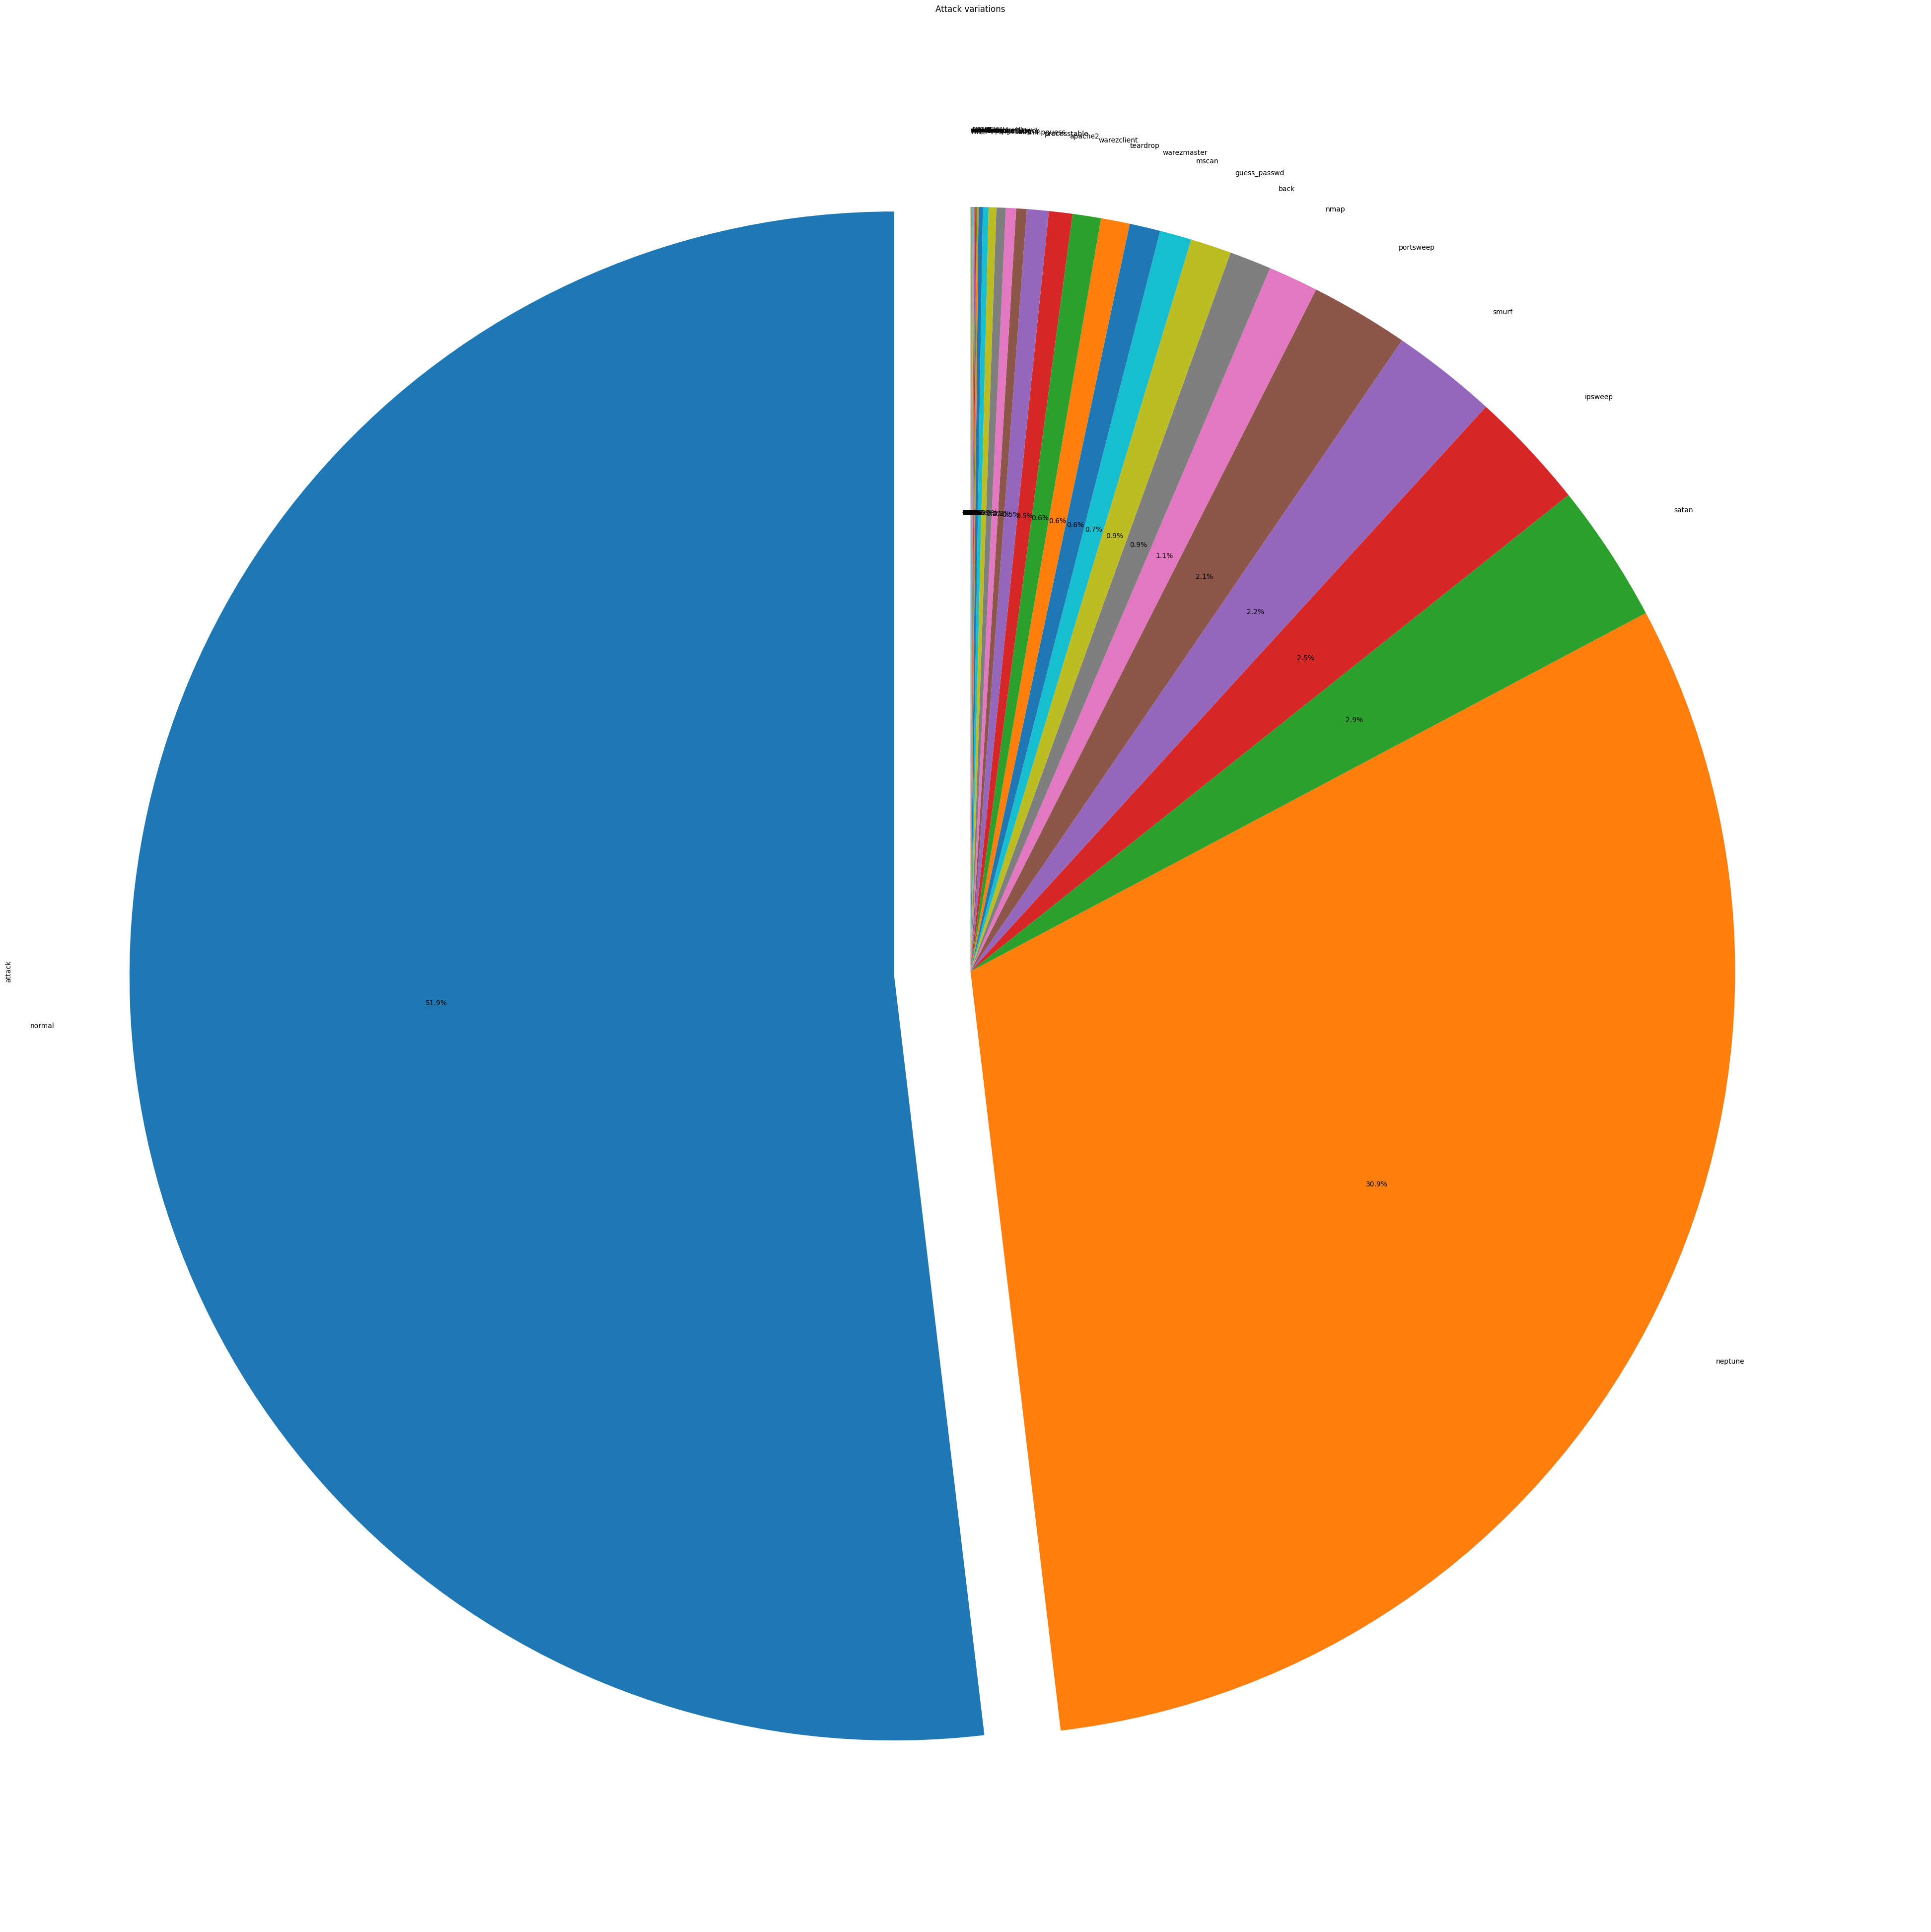

In [ ]:
plt.figure(figsize = (50, 50))
explode = tuple([0.1] + [0]*(len(df['attack'].unique())-1)) # set the first slice to explode
df['attack'].value_counts().plot(kind='pie', explode=explode, startangle=90, autopct='%1.1f%%')
plt.title('Attack variations')
plt.show();

Generalization of the Attacks into Main Types of Attacks to Reduce the Classes

In [ ]:
df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [ ]:
df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'DoS',inplace=True)
df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,DoS,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,DoS,21


In [ ]:
df['attack'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

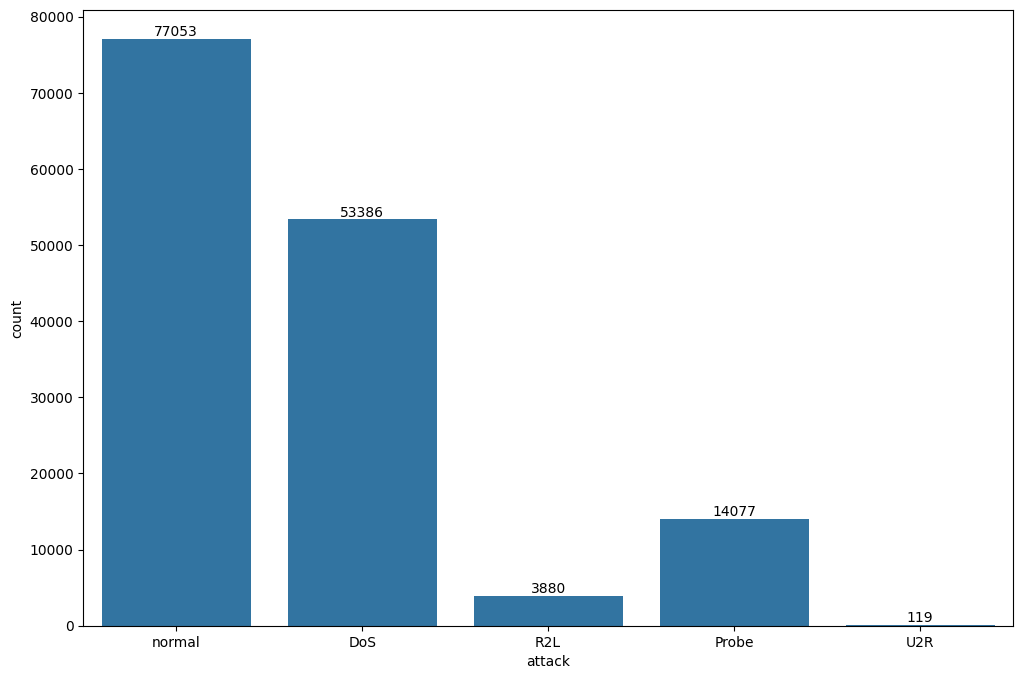

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="attack")
for container in ax.containers:
    ax.bar_label(container)

Tranform the columns into Processable Datatypes

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,DoS,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['protocol_type'] = le.fit_transform(df['protocol_type'])
protocol_type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
protocol_type_mapping

{'icmp': 0, 'tcp': 1, 'udp': 2}

In [ ]:
df['attack'] = le.fit_transform(df['attack'])
attack_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
attack_mapping

{'DoS': 0, 'Probe': 1, 'R2L': 2, 'U2R': 3, 'normal': 4}

In [ ]:
df['service'] = le.fit_transform(df['service'])
service_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
service_mapping

{'IRC': 0,
 'X11': 1,
 'Z39_50': 2,
 'aol': 3,
 'auth': 4,
 'bgp': 5,
 'courier': 6,
 'csnet_ns': 7,
 'ctf': 8,
 'daytime': 9,
 'discard': 10,
 'domain': 11,
 'domain_u': 12,
 'echo': 13,
 'eco_i': 14,
 'ecr_i': 15,
 'efs': 16,
 'exec': 17,
 'finger': 18,
 'ftp': 19,
 'ftp_data': 20,
 'gopher': 21,
 'harvest': 22,
 'hostnames': 23,
 'http': 24,
 'http_2784': 25,
 'http_443': 26,
 'http_8001': 27,
 'imap4': 28,
 'iso_tsap': 29,
 'klogin': 30,
 'kshell': 31,
 'ldap': 32,
 'link': 33,
 'login': 34,
 'mtp': 35,
 'name': 36,
 'netbios_dgm': 37,
 'netbios_ns': 38,
 'netbios_ssn': 39,
 'netstat': 40,
 'nnsp': 41,
 'nntp': 42,
 'ntp_u': 43,
 'other': 44,
 'pm_dump': 45,
 'pop_2': 46,
 'pop_3': 47,
 'printer': 48,
 'private': 49,
 'red_i': 50,
 'remote_job': 51,
 'rje': 52,
 'shell': 53,
 'smtp': 54,
 'sql_net': 55,
 'ssh': 56,
 'sunrpc': 57,
 'supdup': 58,
 'systat': 59,
 'telnet': 60,
 'tftp_u': 61,
 'tim_i': 62,
 'time': 63,
 'urh_i': 64,
 'urp_i': 65,
 'uucp': 66,
 'uucp_path': 67,
 'vmnet'

In [ ]:
df['flag'] = le.fit_transform(df['flag'])
flag_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
flag_mapping

{'OTH': 0,
 'REJ': 1,
 'RSTO': 2,
 'RSTOS0': 3,
 'RSTR': 4,
 'S0': 5,
 'S1': 6,
 'S2': 7,
 'S3': 8,
 'SF': 9,
 'SH': 10}

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,4,15
1,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,19
2,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,4,21
3,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,4,21
4,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0,21


In [ ]:
# Drop the 'level' column
df.drop('level', axis=1, inplace=True)

In [ ]:
df1 = df.copy()
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,4
1,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,4
3,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,4
4,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


In [ ]:
df1.attack.replace([0,1,2,3], 1, inplace=True)
df1.attack.replace([4], 0, inplace=True)

In [ ]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


### Correlation Matrix

In [ ]:
corr_mat1 = df1.corr()

In [ ]:
corr_mat1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
duration,1.000000,0.032642,0.097320,-0.048305,0.068959,0.034056,-0.001651,-0.009616,0.002426,0.000664,0.000525,-0.064476,0.043998,0.046792,0.087257,0.046908,0.083243,-0.000996,0.067388,NaN,-0.000825,-0.000260,-0.078091,-0.039095,-0.064629,-0.064627,0.164667,0.165063,0.074720,-0.017784,-0.039486,0.050312,-0.098015,-0.104633,0.223635,0.201275,-0.025950,-0.053811,-0.052307,0.143902,0.163311,0.052119
protocol_type,0.032642,1.000000,0.049475,0.096866,-0.000992,-0.000604,-0.001938,0.158072,-0.001373,-0.012419,-0.007899,-0.108421,-0.001515,-0.005131,-0.003041,-0.001593,-0.003078,-0.002503,-0.005562,NaN,-0.001187,-0.014738,-0.046058,0.043607,-0.076005,-0.077927,-0.053578,-0.053492,0.039741,0.030947,-0.213853,0.226783,0.103030,0.008186,0.124318,-0.190566,-0.344225,-0.078622,-0.077207,-0.027709,-0.053706,-0.271632
service,0.097320,0.049475,1.000000,-0.307945,-0.002055,0.003173,-0.011187,0.076064,0.015840,-0.065115,0.072407,-0.163259,0.019022,0.038076,0.039913,0.019446,0.032580,0.012314,0.028002,NaN,-0.001367,-0.086747,0.107570,-0.233106,0.251197,0.248712,0.176664,0.174061,-0.362567,0.213620,-0.075737,0.207733,-0.395162,-0.444808,0.274432,-0.116954,-0.161066,0.257420,0.256551,0.185959,0.180159,0.299903
flag,-0.048305,0.096866,-0.307945,1.000000,-0.007054,-0.003574,-0.010390,0.062726,0.007633,0.065992,0.024321,0.569377,0.007033,0.024265,0.011347,0.007447,0.014027,0.013911,0.029638,NaN,0.006596,0.079972,-0.467568,0.186786,-0.401206,-0.396120,-0.771898,-0.773601,0.722524,-0.304357,0.172608,-0.316338,0.585083,0.638224,-0.272877,0.204225,0.080388,-0.392776,-0.391250,-0.712049,-0.756076,-0.629552
src_bytes,0.068959,-0.000992,-0.002055,-0.007054,1.000000,0.000212,-0.000109,-0.000633,-0.000074,0.000347,-0.000443,-0.003286,-0.000079,-0.000274,-0.000166,-0.000087,-0.000151,-0.000130,-0.000302,NaN,-0.000067,-0.000817,-0.004796,-0.002609,-0.002785,-0.002990,0.011592,0.011812,0.003634,-0.000637,-0.002500,-0.005586,-0.006663,-0.006312,0.000730,0.000559,-0.001424,-0.004003,-0.002959,-0.001745,0.010495,0.005457
dst_bytes,0.034056,-0.000604,0.003173,-0.003574,0.000212,1.000000,-0.000068,-0.000394,0.000179,-0.000297,0.000096,-0.002635,0.001253,0.000971,0.001155,0.001250,0.000086,-0.000061,0.000353,NaN,-0.000038,-0.000461,-0.003226,-0.001611,-0.002665,-0.002649,0.009447,0.009377,0.003450,-0.001588,-0.001553,0.002225,-0.003977,-0.004168,0.009834,0.010847,-0.001143,-0.002639,-0.002567,0.009986,0.009600,0.003583
land,-0.001651,-0.001938,-0.011187,-0.010390,-0.000109,-0.000068,1.000000,-0.001255,-0.000153,-0.001381,-0.000878,-0.012056,-0.000168,-0.000571,-0.000338,-0.000177,-0.000342,-0.000278,-0.000618,NaN,-0.000132,-0.001639,-0.010042,-0.005144,0.024544,0.025271,-0.005061,-0.005948,0.009253,-0.002565,0.040548,-0.024564,-0.015214,0.009425,-0.004612,0.032151,0.072119,0.020496,0.015019,-0.005983,-0.005972,0.008817
wrong_fragment,-0.009616,0.158072,0.076064,0.062726,-0.000633,-0.000394,-0.001255,1.000000,-0.000889,-0.008042,-0.005115,-0.070208,-0.000981,-0.003323,-0.001969,-0.001031,-0.001993,-0.001621,-0.003602,NaN,-0.000768,-0.009543,-0.019921,0.021143,-0.038163,-0.050462,-0.034368,-0.034638,0.051176,-0.025897,-0.022830,0.032552,-0.046660,-0.046592,0.051988,0.040057,-0.009778,-0.045496,-0.049995,0.019285,-0.034777,0.081697
urgent,0.002426,-0.001373,0.015840,0.007633,-0.000074,0.000179,-0.000153,-0.000889,1.000000,0.008151,0.037775,0.011253,0.029034,0.178312,0

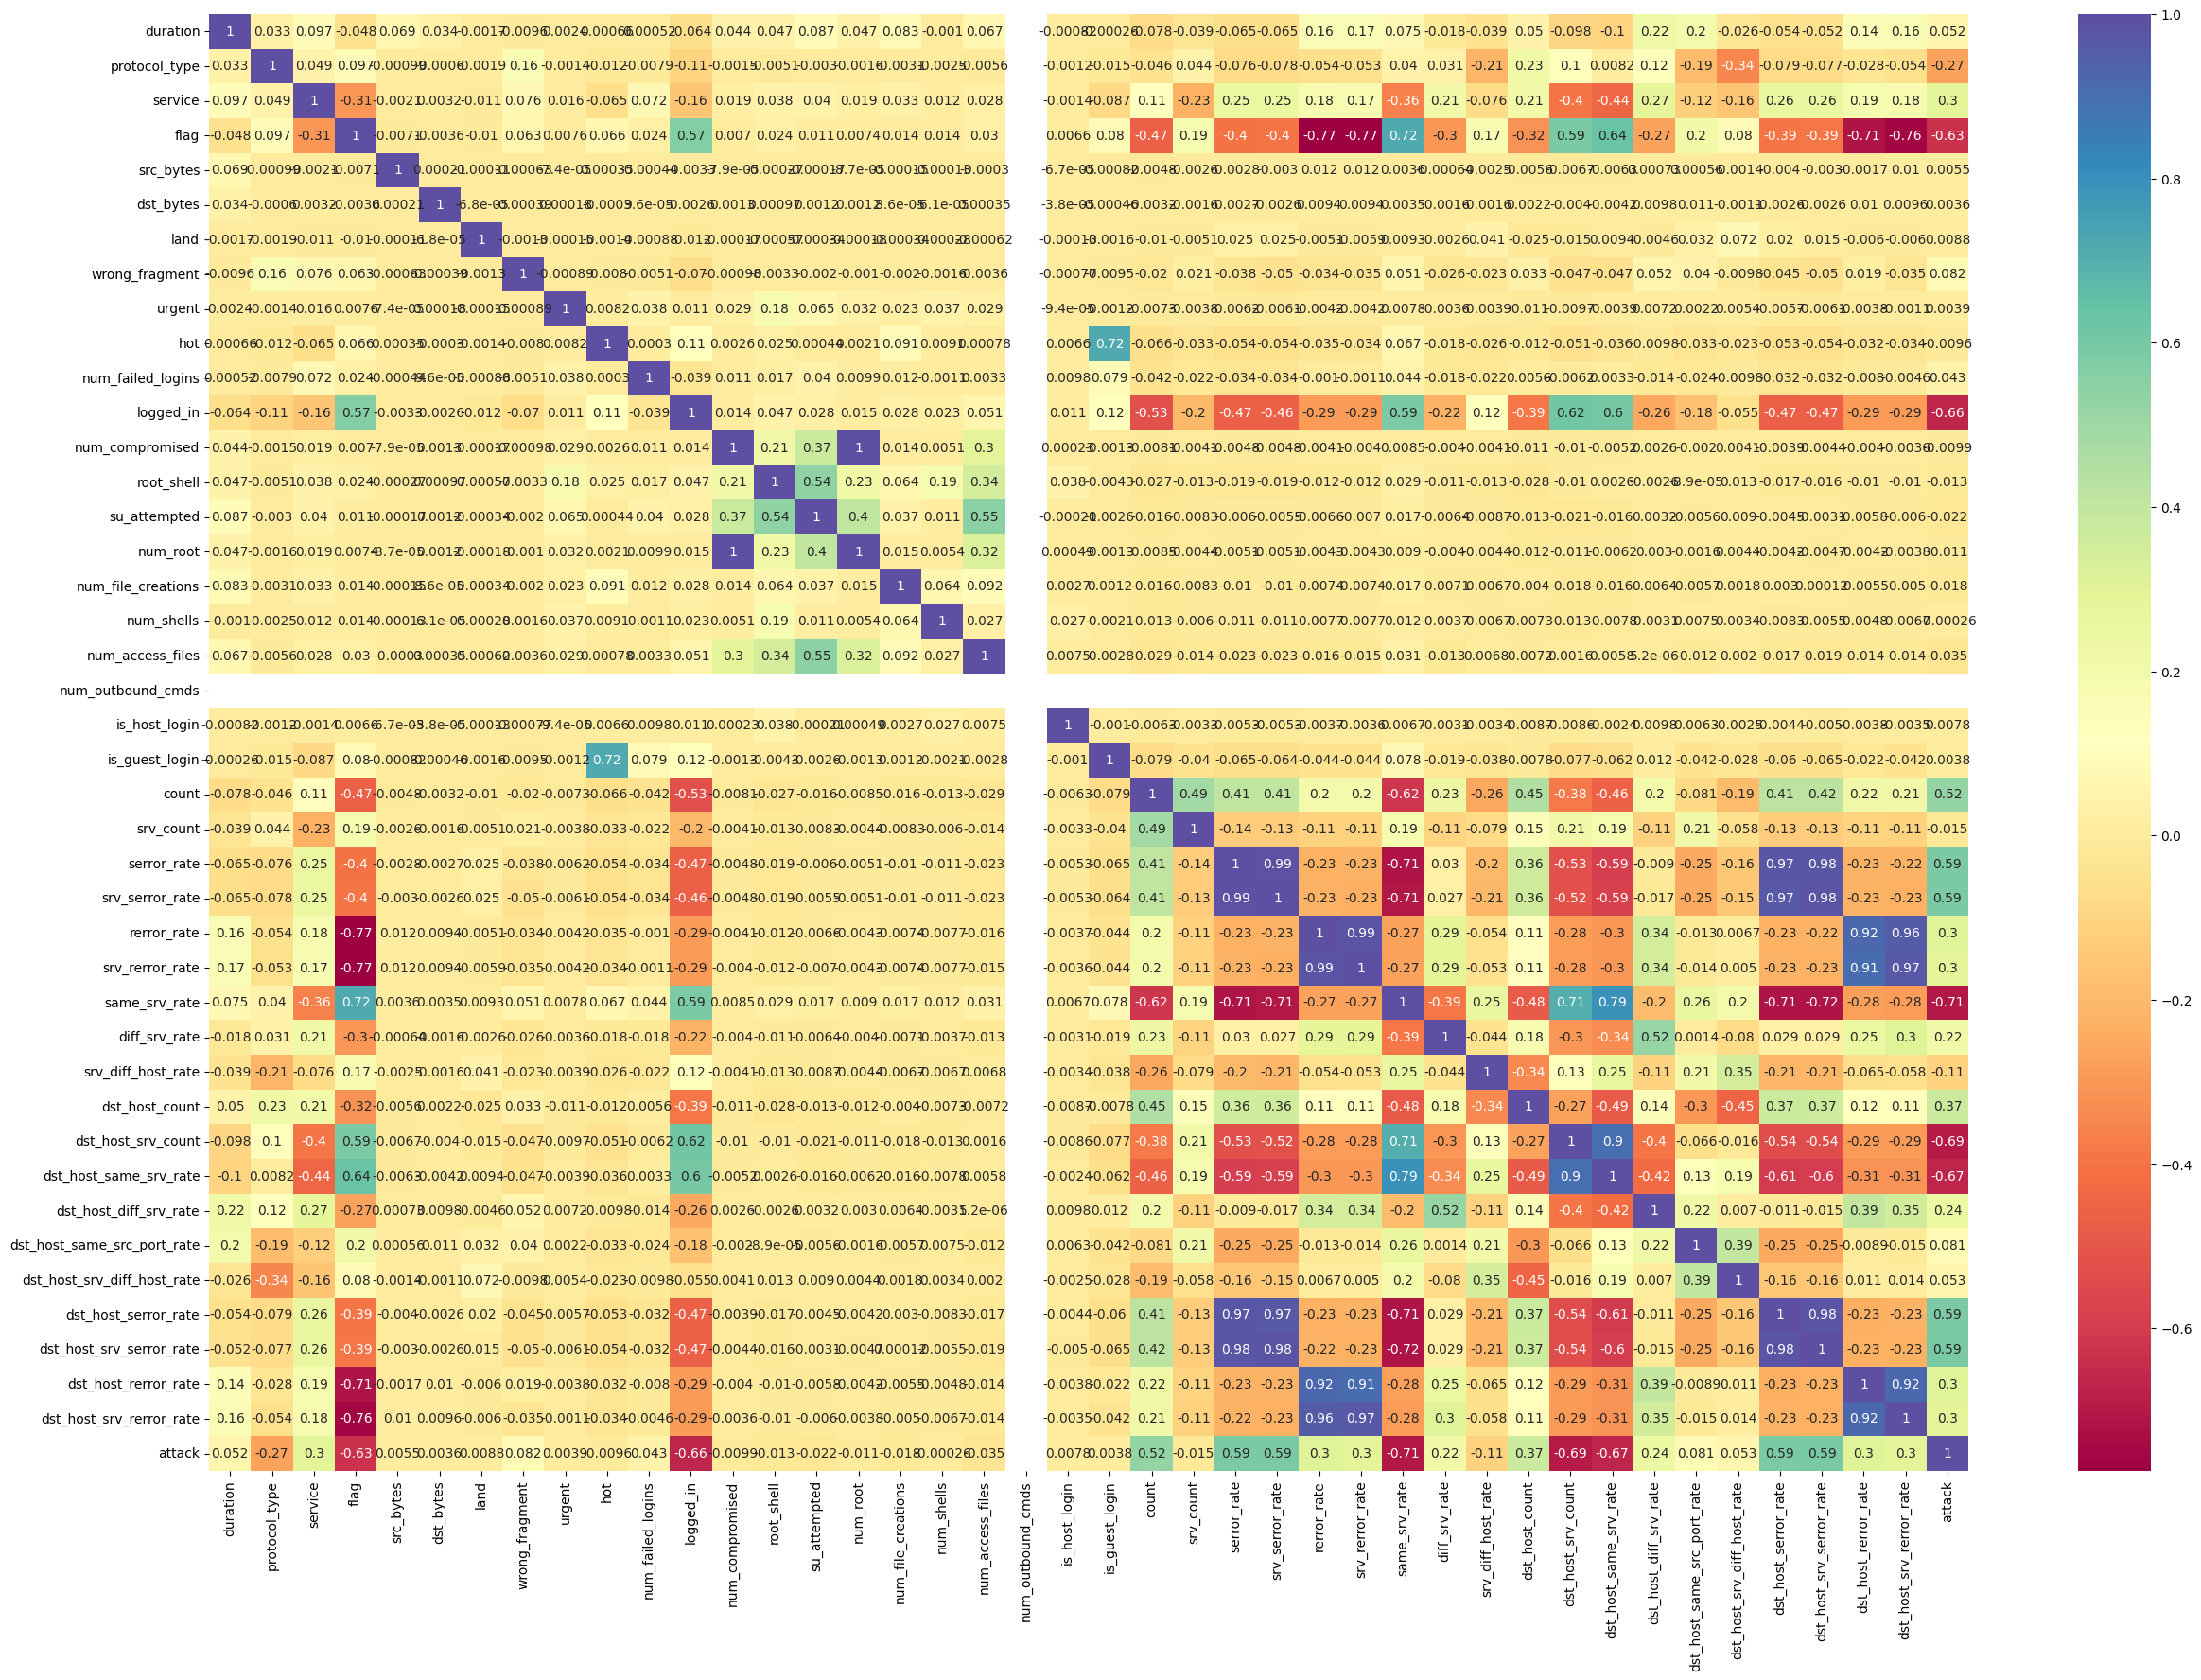

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(corr_mat1, annot=True, cmap='Spectral');

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
1,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
2,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
3,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
4,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,54,9,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,4
22539,0,1,24,9,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,4
22540,0,1,24,9,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,0
22541,0,2,12,9,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,4


In [ ]:
X = df.drop('attack', axis=1)
y = df['attack']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Creating a Function to Test the Model Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluateModel(modelName, y_true, y_pred):
  print(f"Accuracy Score for {modelName}: ", accuracy_score(y_true, y_pred))
  print(f"Precision Score for {modelName}: ", precision_score(y_true, y_pred, average='weighted'))
  print(f"Recall Score for {modelName}: ", recall_score(y_true, y_pred, average='weighted'))
  print(f"F1 Score for {modelName}: ", f1_score(y_true, y_pred, average='weighted'))
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()

## Machine Learning Models

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_preds_dtc = dtc.predict(X_test)

In [ ]:
y_preds_dtc

array([4, 4, 4, ..., 1, 0, 4])

Accuracy Score for Decsion Tree Classifier:  0.9946133387199946
Precision Score for Decsion Tree Classifier:  0.9946293898462841
Recall Score for Decsion Tree Classifier:  0.9946133387199946
F1 Score for Decsion Tree Classifier:  0.9946210587956554


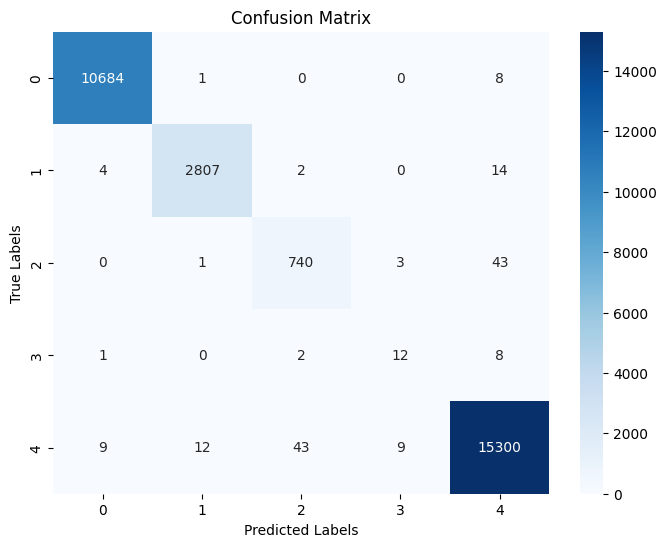

In [ ]:
evaluateModel("Decsion Tree Classifier", y_test, y_preds_dtc)

### k-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=5)
knnc.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_preds_knnc = knnc.predict(X_test)

Accuracy Score for k Nearest Neighbours Classifier:  0.9877790122209877
Precision Score for k Nearest Neighbours Classifier:  0.9875606168676232
Recall Score for k Nearest Neighbours Classifier:  0.9877790122209877
F1 Score for k Nearest Neighbours Classifier:  0.9875756187129345


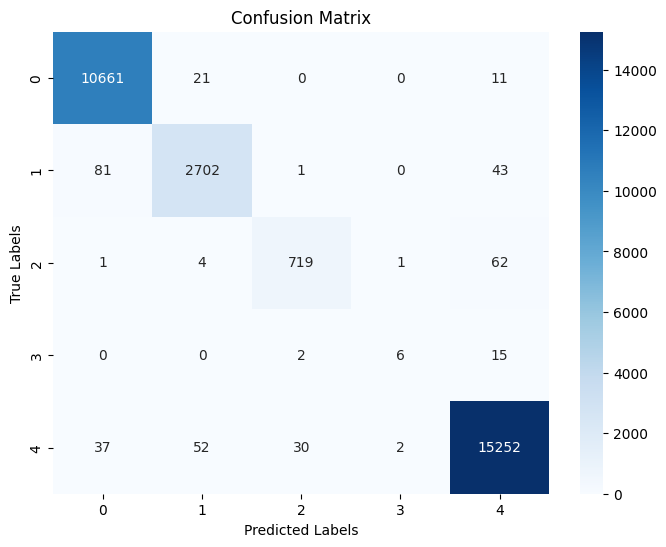

In [ ]:
evaluateModel("k Nearest Neighbours Classifier", y_test, y_preds_knnc)

### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnbc = GaussianNB()
gnbc.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds_gnbc = gnbc.predict(X_test)

Accuracy Score for Guassian Naive Bayes Classifier:  0.43056256943743054
Precision Score for Guassian Naive Bayes Classifier:  0.6217819800885566
Recall Score for Guassian Naive Bayes Classifier:  0.43056256943743054
F1 Score for Guassian Naive Bayes Classifier:  0.34234195145957835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


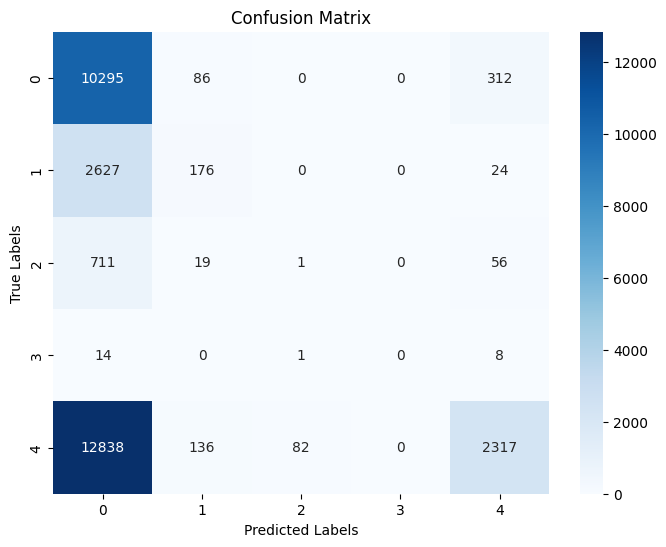

In [ ]:
evaluateModel("Guassian Naive Bayes Classifier", y_test, y_preds_gnbc)

### Support Vector Classification

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_preds_svc = svc.predict(X_test)

Accuracy Score for Support Vector Classification:  0.9829310170689829
Precision Score for Support Vector Classification:  0.9825031532850032
Recall Score for Support Vector Classification:  0.9829310170689829
F1 Score for Support Vector Classification:  0.9825776600378672


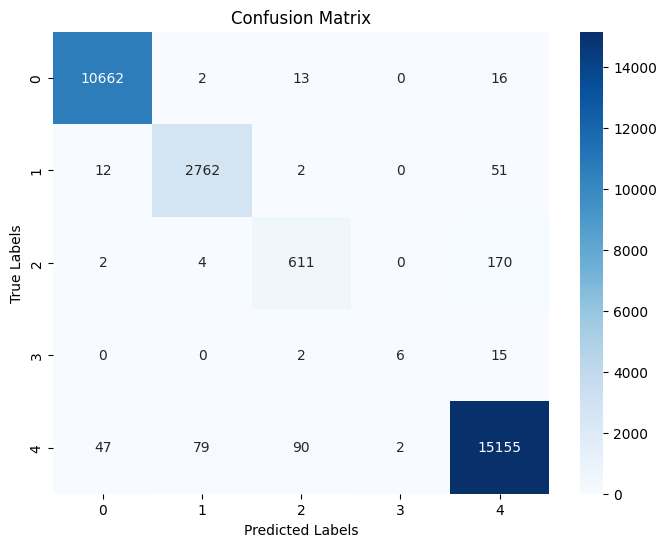

In [ ]:
evaluateModel("Support Vector Classification", y_test, y_preds_svc)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_preds_rfc = rfc.predict(X_test)

Accuracy Score for Random Forest Classifier:  0.9955896710769956
Precision Score for Random Forest Classifier:  0.9955242889616721
Recall Score for Random Forest Classifier:  0.9955896710769956
F1 Score for Random Forest Classifier:  0.9955235813096756


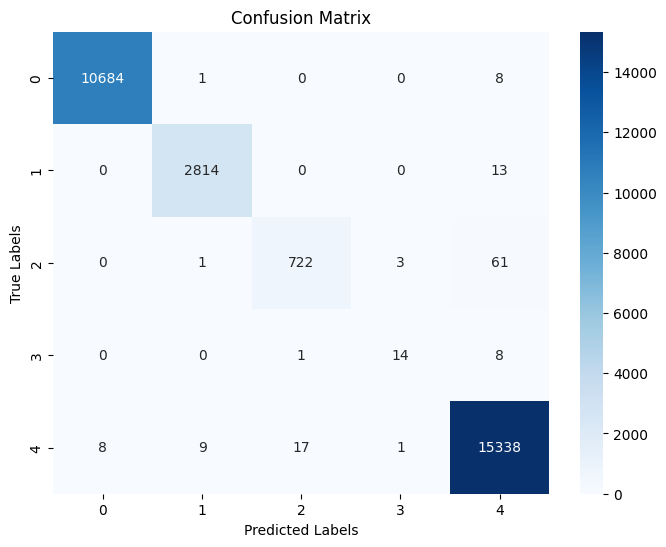

In [ ]:
evaluateModel("Random Forest Classifier", y_test, y_preds_rfc)

## Deep Learning Models

### Multi-Layer Perceptron (MLP) Classifier (Backpropagation)


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='adam', alpha=1e-5, random_state=1)
mlpc.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, random_state=1)

In [ ]:
y_preds_mlpc = mlpc.predict(X_test)

Accuracy Score for Multi-Layer Perceptron (MLP) Classifier:  0.9499040500959499
Precision Score for Multi-Layer Perceptron (MLP) Classifier:  0.9506669279101804
Recall Score for Multi-Layer Perceptron (MLP) Classifier:  0.9499040500959499
F1 Score for Multi-Layer Perceptron (MLP) Classifier:  0.9502428307908559


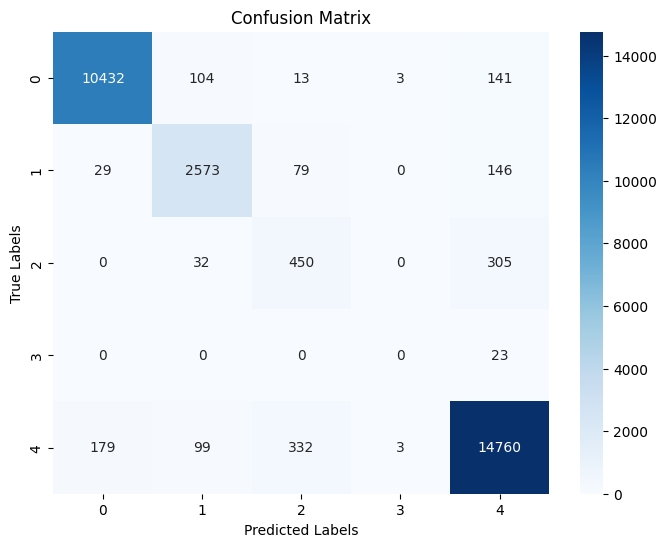

In [ ]:
evaluateModel("Multi-Layer Perceptron (MLP) Classifier", y_test, y_preds_mlpc)

## Testing with Extracted Features

Generating and Splitting the Model Datasets

In [ ]:
X1_train_e = X_train[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'urgent', 'num_failed_logins', 'serror_rate', 'rerror_rate']]
X1_test_e = X_test[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'urgent', 'num_failed_logins', 'serror_rate', 'rerror_rate']]
y1_train_e = y_train
y1_test_e = y_test

### Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier()
rfc2.fit(X1_train_e, y1_train_e)

RandomForestClassifier()

In [ ]:
y_preds_rfc2 = rfc2.predict(X1_test_e)

Accuracy Score for Random Forest Classifier:  0.9823923509409824
Precision Score for Random Forest Classifier:  0.9824012827163215
Recall Score for Random Forest Classifier:  0.9823923509409824
F1 Score for Random Forest Classifier:  0.9821307264902407


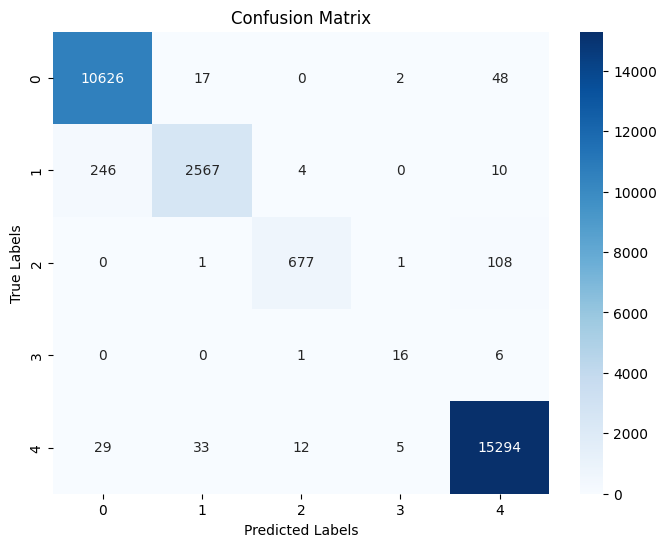

In [ ]:
evaluateModel("Random Forest Classifier", y1_test_e, y_preds_rfc2)

### Random Forest Classifier with Hyperparameter

In [ ]:
rfc3 = RandomForestClassifier(n_estimators=200, min_samples_split=5)
rfc3.fit(X1_train_e, y1_train_e)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [ ]:
y_preds_rfc3 = rfc3.predict(X1_test_e)

Accuracy Score for Random Forest Classifier:  0.9824596842069825
Precision Score for Random Forest Classifier:  0.9824560667899551
Recall Score for Random Forest Classifier:  0.9824596842069825
F1 Score for Random Forest Classifier:  0.9821925025106192


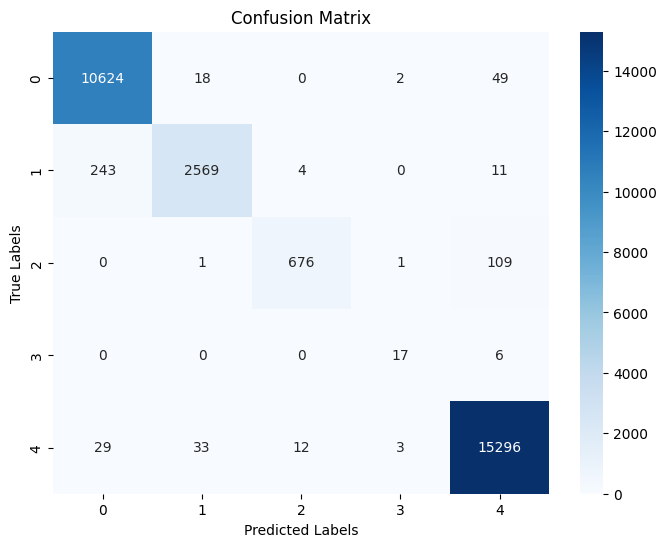

In [ ]:
evaluateModel("Random Forest Classifier", y1_test_e, y_preds_rfc3)

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X1_train_e, y1_train_e)

GradientBoostingClassifier()

In [ ]:
y_preds_gbc = gbc.predict(X1_test_e)

Accuracy Score for Gradient Boosting Classifier:  0.9775106891559775
Precision Score for Gradient Boosting Classifier:  0.9775299312145848
Recall Score for Gradient Boosting Classifier:  0.9775106891559775
F1 Score for Gradient Boosting Classifier:  0.9769810809202762


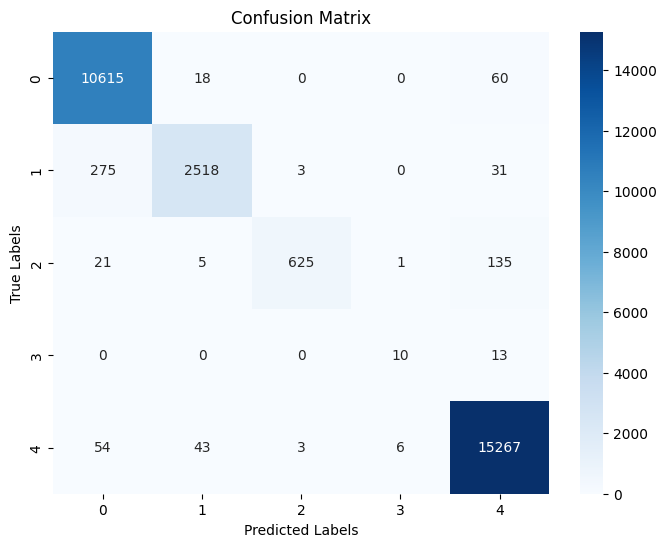

In [ ]:
evaluateModel("Gradient Boosting Classifier", y1_test_e, y_preds_gbc)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc2.fit(X1_train_e, y1_train_e)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_preds_dtc2 = dtc2.predict(X1_test_e)

Accuracy Score for Decision Tree Classifier:  0.9816853516479817
Precision Score for Decision Tree Classifier:  0.9816677026537801
Recall Score for Decision Tree Classifier:  0.9816853516479817
F1 Score for Decision Tree Classifier:  0.9814385968500047


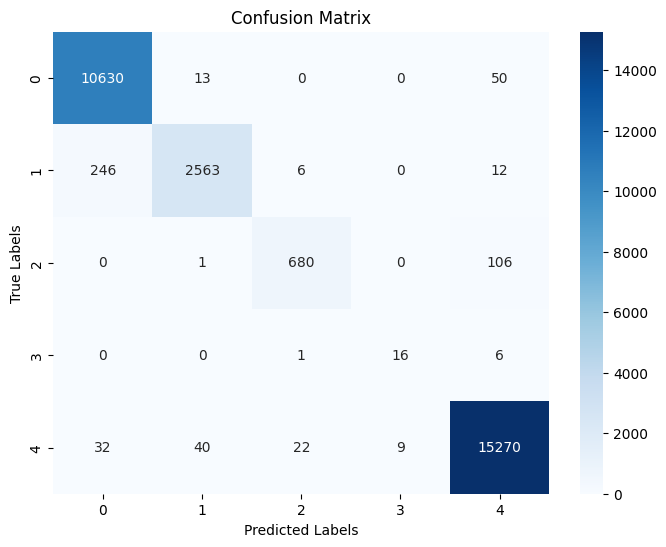

In [ ]:
evaluateModel("Decision Tree Classifier", y1_test_e, y_preds_dtc2)

Random Forest Classifier is found to be the best performing model.

## Save Models

### Save Model using Pickle

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rfc2, f)

### Save Model using Joblib

In [ ]:
import joblib
joblib.dump(rfc2, 'model.joblib')

['model.joblib']

In [ ]:
X_export = pd.concat([X1_train_e, X1_test_e], axis=0)
X_export

,duration,protocol_type,service,flag,src_bytes,dst_bytes,urgent,num_failed_logins,serror_rate,rerror_rate
104189,0,1,24,9,196,527,0,0,0.0,0.0
90082,0,1,49,5,0,0,0,0,1.0,0.0
113182,0,1,55,5,0,0,0,0,1.0,0.0
40241,0,1,28,5,0,0,0,0,1.0,0.0
2605,0,1,24,9,326,3604,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
549,0,1,24,9,205,255,0,0,0.0,0.0
4439,0,2,12,9,45,132,0,0,0.0,0.0
41963,0,1,49,4,0,0,0,0,0.0,1.0
8871,0,1,49,5,0,0,0,0,1.0,0.0


In [ ]:
y_export = pd.concat([y1_train_e, y1_test_e], axis=0)
y_export

104189    4
90082     0
113182    0
40241     0
2605      4
         ..
549       4
4439      4
41963     1
8871      0
99788     4
Name: attack, Length: 148515, dtype: int64

In [ ]:
X.to_csv('X.csv')
y.to_csv('y.csv')

In [ ]:
joblib.dump(dtc2, 'model2.joblib')

['model2.joblib']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model2 = joblib.load('model2.joblib')
att = model2.predict([[0.0, 2, 12, 10, 133, 133, 0, 0, 0, 0]])
print(att)

[4]


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
print(joblib.__version__)

1.3.2


In [ ]:
model = joblib.load('model.joblib')
att = model.predict([[0.0, 1, 24, 0, 0, 0, 0, 0, 0.0, 0.0]])
print(att)

[4]


In [ ]:
model = joblib.load('model.joblib')
att = model.predict([[0.0 , 2 , 12 , 5 , 28 , 28 , 0 , 0 , 0 , 0]])
print(att)

[4]


In [ ]:
attack_encoding = {0: 'DoS', 1: 'Probe', 2: 'R2L', 3: 'U2R', 4: 'normal'}

In [ ]:
packets_tcp = [[ 24.0 , 2 , 56 , 9 , 3930 , 3930 , 0 , 0 , 0 , 0 ],
[ 360.0 , 1 , 56 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 0.0 , 1 , 56 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 8859.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 14266.0 , 1 , 49 , 0 , 353 , 353 , 0 , 0 , 0.0 , 0.0 ],
[ 1306.0 , 1 , 56 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 8.0 , 2 , 56 , 5 , 3930 , 3930 , 0 , 0 , 0 , 0 ],
[ 9097.0 , 1 , 44 , 0 , 605 , 605 , 0 , 0 , 0.0 , 0.0 ],
[ 6622.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 6098.0 , 1 , 24 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 521.0 , 1 , 49 , 0 , 1024 , 1024 , 0 , 0 , 0.0 , 0.0 ],
[ 5379.0 , 1 , 49 , 0 , 464 , 464 , 0 , 0 , 0.0 , 0.0 ],
[ 240.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 2321.0 , 1 , 49 , 0 , 239 , 239 , 0 , 0 , 0.0 , 0.0 ],
[ 1.0 , 1 , 12 , 0 , 1018 , 1018 , 0 , 0 , 0.0 , 0.0 ],
[ 61.0 , 1 , 44 , 0 , 1024 , 1024 , 0 , 0 , 0.0 , 0.0 ],
[ 11014.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 11512.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 27794.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 41032.0 , 1 , 49 , 0 , 38 , 38 , 0 , 0 , 0.0 , 0.0 ]]

In [ ]:
for i in packets_tcp:
  print(i, " : ", attack_encoding[model.predict([i])[0]])

[24.0, 2, 56, 9, 3930, 3930, 0, 0, 0, 0]  :  normal
[360.0, 1, 56, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[0.0, 1, 56, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[8859.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[14266.0, 1, 49, 0, 353, 353, 0, 0, 0.0, 0.0]  :  normal
[1306.0, 1, 56, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[8.0, 2, 56, 5, 3930, 3930, 0, 0, 0, 0]  :  normal
[9097.0, 1, 44, 0, 605, 605, 0, 0, 0.0, 0.0]  :  normal
[6622.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[6098.0, 1, 24, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[521.0, 1, 49, 0, 1024, 1024, 0, 0, 0.0, 0.0]  :  normal
[5379.0, 1, 49, 0, 464, 464, 0, 0, 0.0, 0.0]  :  normal
[240.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[2321.0, 1, 49, 0, 239, 239, 0, 0, 0.0, 0.0]  :  normal
[1.0, 1, 12, 0, 1018, 1018, 0, 0, 0.0, 0.0]  :  normal
[61.0, 1, 44, 0, 1024, 1024, 0, 0, 0.0, 0.0]  :  normal
[11014.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[11512.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[27794.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  : 

In [ ]:
packets2_tcp = [[ 0.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 587615.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 896548.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 19979.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 367063.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 45043.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 299228.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 20376.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 290293.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 139097.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 838333.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 505704.99999999994 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 1163835.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 926599.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 1390666.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 447315.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 506811.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 932477.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 95846.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 18657.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ]]

In [ ]:
for i in packets2_tcp:
  print(i, " : ", attack_encoding[model.predict([i])[0]])

[0.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[587615.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[896548.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[19979.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[367063.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[45043.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[299228.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[20376.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[290293.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[139097.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[838333.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[505704.99999999994, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[1163835.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[926599.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[1390666.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[447315.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[506811.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[932477.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[95846.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 

In [ ]:
packets3_tcp = [[ 0.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 629.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 557.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 108.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 570.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 353.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 74.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 354.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 596.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 82.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 211.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 606.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 144.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 1861.0 , 1 , 44 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 796.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 1859.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 334.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 790.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 491.0 , 1 , 49 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 201.0 , 1 , 12 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ]]

In [ ]:
for i in packets3_tcp:
  print(i, " : ", attack_encoding[model.predict([i])[0]])

[0.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[629.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[557.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[108.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[570.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[353.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[74.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[354.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[596.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[82.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[211.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[606.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[144.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[1861.0, 1, 44, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[796.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[1859.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[334.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  normal
[790.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[491.0, 1, 49, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[201.0, 1, 12, 0, 0, 0, 0, 0, 0.0, 0.0]  :  nor

In [ ]:
packets4_icmp = [[ 3.0 , 2 , 49 , 10 , 44 , 44 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 44 , 5 , 814 , 814 , 0 , 0 , 0 , 0 ],
[ 255.00000000000003 , 2 , 12 , 5 , 761 , 761 , 0 , 0 , 0 , 0 ],
[ 31.0 , 2 , 49 , 10 , 97 , 97 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 12 , 5 , 85 , 85 , 0 , 0 , 0 , 0 ],
[ 50.0 , 1 , 26 , 0 , 0 , 0 , 0 , 0 , 0.0 , 0.0 ],
[ 9.0 , 1 , 12 , 0 , 64 , 64 , 0 , 0 , 0.0 , 0.0 ],
[ 16.0 , 1 , 12 , 0 , 128 , 128 , 0 , 0 , 0.0 , 0.0 ],
[ 37.0 , 1 , 44 , 0 , 64 , 64 , 0 , 0 , 0.0 , 0.0 ],
[ 26.0 , 2 , 49 , 5 , 263 , 263 , 0 , 0 , 0 , 0 ],
[ 6.0 , 2 , 12 , 5 , 417 , 417 , 0 , 0 , 0 , 0 ],
[ 14.0 , 2 , 44 , 5 , 210 , 210 , 0 , 0 , 0 , 0 ],
[ 26.0 , 2 , 44 , 5 , 364 , 364 , 0 , 0 , 0 , 0 ],
[ 36.0 , 2 , 49 , 10 , 44 , 44 , 0 , 0 , 0 , 0 ],
[ 35.0 , 2 , 44 , 10 , 97 , 97 , 0 , 0 , 0 , 0 ],
[ 36.0 , 2 , 49 , 10 , 208 , 208 , 0 , 0 , 0 , 0 ],
[ 36.0 , 2 , 12 , 10 , 261 , 261 , 0 , 0 , 0 , 0 ],
[ 17.0 , 2 , 12 , 10 , 44 , 44 , 0 , 0 , 0 , 0 ],
[ 35.0 , 2 , 44 , 10 , 97 , 97 , 0 , 0 , 0 , 0 ],
[ 69.0 , 2 , 49 , 5 , 735 , 735 , 0 , 0 , 0 , 0 ],
[ 5.0 , 2 , 49 , 5 , 322 , 322 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 12 , 5 , 280 , 280 , 0 , 0 , 0 , 0 ],
[ 11.0 , 2 , 12 , 5 , 682 , 682 , 0 , 0 , 0 , 0 ],
[ 14.0 , 2 , 49 , 5 , 269 , 269 , 0 , 0 , 0 , 0 ],
[ 14.0 , 2 , 44 , 5 , 227 , 227 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 44 , 5 , 1235 , 1235 , 0 , 0 , 0 , 0 ],
[ 33.0 , 2 , 49 , 5 , 1182 , 1182 , 0 , 0 , 0 , 0 ],
[ 148.0 , 2 , 44 , 5 , 340 , 340 , 0 , 0 , 0 , 0 ],
[ 21.0 , 2 , 44 , 5 , 287 , 287 , 0 , 0 , 0 , 0 ],
[ 8.0 , 2 , 44 , 5 , 489 , 489 , 0 , 0 , 0 , 0 ],
[ 11.0 , 2 , 12 , 5 , 436 , 436 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 44 , 10 , 197 , 197 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 49 , 5 , 243 , 243 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 44 , 5 , 411 , 411 , 0 , 0 , 0 , 0 ],
[ 3.0 , 2 , 12 , 10 , 44 , 44 , 0 , 0 , 0 , 0 ],
[ 160.0 , 2 , 12 , 5 , 190 , 190 , 0 , 0 , 0 , 0 ],
[ 61.0 , 2 , 49 , 5 , 358 , 358 , 0 , 0 , 0 , 0 ],
[ 39.0 , 2 , 44 , 10 , 250 , 250 , 0 , 0 , 0 , 0 ],
[ 28.0 , 2 , 12 , 10 , 97 , 97 , 0 , 0 , 0 , 0 ],
[ 5.0 , 2 , 12 , 5 , 321 , 321 , 0 , 0 , 0 , 0 ],
[ 83.0 , 2 , 12 , 5 , 268 , 268 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 12 , 5 , 227 , 227 , 0 , 0 , 0 , 0 ],
[ 5.0 , 2 , 44 , 5 , 223 , 223 , 0 , 0 , 0 , 0 ],
[ 61.0 , 2 , 12 , 5 , 174 , 174 , 0 , 0 , 0 , 0 ],
[ 29.0 , 2 , 49 , 5 , 170 , 170 , 0 , 0 , 0 , 0 ],
[ 5.0 , 2 , 49 , 10 , 44 , 44 , 0 , 0 , 0 , 0 ],
[ 53.0 , 2 , 44 , 10 , 97 , 97 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 49 , 5 , 517 , 517 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 44 , 10 , 184 , 184 , 0 , 0 , 0 , 0 ],
[ 43.0 , 2 , 44 , 5 , 464 , 464 , 0 , 0 , 0 , 0 ]]

In [ ]:
for i in packets4_icmp:
  print(i, " : ", attack_encoding[model.predict([i])[0]])

[3.0, 2, 49, 10, 44, 44, 0, 0, 0, 0]  :  normal
[2.0, 2, 44, 5, 814, 814, 0, 0, 0, 0]  :  normal
[255.00000000000003, 2, 12, 5, 761, 761, 0, 0, 0, 0]  :  normal
[31.0, 2, 49, 10, 97, 97, 0, 0, 0, 0]  :  normal
[2.0, 2, 12, 5, 85, 85, 0, 0, 0, 0]  :  normal
[50.0, 1, 26, 0, 0, 0, 0, 0, 0.0, 0.0]  :  Probe
[9.0, 1, 12, 0, 64, 64, 0, 0, 0.0, 0.0]  :  normal
[16.0, 1, 12, 0, 128, 128, 0, 0, 0.0, 0.0]  :  normal
[37.0, 1, 44, 0, 64, 64, 0, 0, 0.0, 0.0]  :  normal
[26.0, 2, 49, 5, 263, 263, 0, 0, 0, 0]  :  normal
[6.0, 2, 12, 5, 417, 417, 0, 0, 0, 0]  :  normal
[14.0, 2, 44, 5, 210, 210, 0, 0, 0, 0]  :  normal
[26.0, 2, 44, 5, 364, 364, 0, 0, 0, 0]  :  normal
[36.0, 2, 49, 10, 44, 44, 0, 0, 0, 0]  :  normal
[35.0, 2, 44, 10, 97, 97, 0, 0, 0, 0]  :  normal
[36.0, 2, 49, 10, 208, 208, 0, 0, 0, 0]  :  normal
[36.0, 2, 12, 10, 261, 261, 0, 0, 0, 0]  :  normal
[17.0, 2, 12, 10, 44, 44, 0, 0, 0, 0]  :  normal
[35.0, 2, 44, 10, 97, 97, 0, 0, 0, 0]  :  normal
[69.0, 2, 49, 5, 735, 735, 0, 0, 0, 0]  

In [ ]:
packets5_udp = [[ 0.0 , 2 , 49 , 10 , 735 , 735 , 0 , 0 , 0 , 0 ],
[ 10.0 , 2 , 12 , 10 , 711 , 711 , 0 , 0 , 0 , 0 ],
[ 32.0 , 2 , 44 , 10 , 725 , 725 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 49 , 10 , 722 , 722 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 49 , 10 , 725 , 725 , 0 , 0 , 0 , 0 ],
[ 32.0 , 2 , 44 , 10 , 780 , 780 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 44 , 10 , 716 , 716 , 0 , 0 , 0 , 0 ],
[ 10.0 , 2 , 12 , 10 , 720 , 720 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 44 , 10 , 714 , 714 , 0 , 0 , 0 , 0 ],
[ 10.0 , 2 , 44 , 10 , 745 , 745 , 0 , 0 , 0 , 0 ],
[ 17.0 , 2 , 49 , 10 , 723 , 723 , 0 , 0 , 0 , 0 ],
[ 4.0 , 2 , 49 , 10 , 725 , 725 , 0 , 0 , 0 , 0 ],
[ 10.0 , 2 , 44 , 10 , 725 , 725 , 0 , 0 , 0 , 0 ],
[ 21.0 , 2 , 49 , 10 , 725 , 725 , 0 , 0 , 0 , 0 ],
[ 2.0 , 2 , 44 , 10 , 745 , 745 , 0 , 0 , 0 , 0 ],
[ 18.0 , 2 , 44 , 10 , 724 , 724 , 0 , 0 , 0 , 0 ],
[ 26.0 , 2 , 49 , 10 , 720 , 720 , 0 , 0 , 0 , 0 ],
[ 5.0 , 2 , 49 , 10 , 710 , 710 , 0 , 0 , 0 , 0 ],
[ 1.0 , 2 , 49 , 10 , 731 , 731 , 0 , 0 , 0 , 0 ],
[ 10.0 , 2 , 12 , 10 , 727 , 727 , 0 , 0 , 0 , 0 ]]

In [ ]:
for i in packets5_udp:
  print(i, " : ", attack_encoding[model.predict([i])[0]])

[0.0, 2, 49, 10, 735, 735, 0, 0, 0, 0]  :  normal
[10.0, 2, 12, 10, 711, 711, 0, 0, 0, 0]  :  normal
[32.0, 2, 44, 10, 725, 725, 0, 0, 0, 0]  :  normal
[4.0, 2, 49, 10, 722, 722, 0, 0, 0, 0]  :  normal
[2.0, 2, 49, 10, 725, 725, 0, 0, 0, 0]  :  normal
[32.0, 2, 44, 10, 780, 780, 0, 0, 0, 0]  :  normal
[2.0, 2, 44, 10, 716, 716, 0, 0, 0, 0]  :  normal
[10.0, 2, 12, 10, 720, 720, 0, 0, 0, 0]  :  normal
[2.0, 2, 44, 10, 714, 714, 0, 0, 0, 0]  :  normal
[10.0, 2, 44, 10, 745, 745, 0, 0, 0, 0]  :  normal
[17.0, 2, 49, 10, 723, 723, 0, 0, 0, 0]  :  normal
[4.0, 2, 49, 10, 725, 725, 0, 0, 0, 0]  :  normal
[10.0, 2, 44, 10, 725, 725, 0, 0, 0, 0]  :  normal
[21.0, 2, 49, 10, 725, 725, 0, 0, 0, 0]  :  normal
[2.0, 2, 44, 10, 745, 745, 0, 0, 0, 0]  :  normal
[18.0, 2, 44, 10, 724, 724, 0, 0, 0, 0]  :  normal
[26.0, 2, 49, 10, 720, 720, 0, 0, 0, 0]  :  normal
[5.0, 2, 49, 10, 710, 710, 0, 0, 0, 0]  :  normal
[1.0, 2, 49, 10, 731, 731, 0, 0, 0, 0]  :  normal
[10.0, 2, 12, 10, 727, 727, 0, 0, 0, 0] 